# pandas - working with tabular data

*notebook by Jeffrey Aryee and Leif Denby*

In this session, you will be introduced to the fundamentals of Pandas and its regular usage. 

The `pandas` library is the best python package for working with tabular data (i.e. data that is organised into rows and columns) and is one of the most preferred tools for data scientists to perform data manipulation and analysis. It is built on fundamental libraries, such as, `matplotlib` for data visualization and `numpy`, for scientific computing. The fast, flexible `pandas` data structures are designed to make real-world data analysis significantly easier, however it takes consistency in practice to master.


## What's pandas for?

Pandas has so many uses. It is essentially your data’s home. Through `pandas`, you get acquainted with your data by cleaning, transforming, and analyzing it. There are numerous tasks you can perform with Pandas on a dataset, which include but is not limited to:

- Calculating statistics of the data, and making inferrence such as
    - What's the average, median, max, or min of each column?
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?, etc.
- Clean the data (eg. removing missing values and filtering rows or columns by certain criteria)
- Visualize the data with help from Matplotlib or Seaborn. 
- Store the cleaned, transformed data into other file.

**Objectives**

The objective of this course is to introduce participants to the functionality of Pandas, with a primal focus on the underlisted:


1. [Installing Pandas](#1.-How-to-Install-Pandas)
2. [Importing Pandas](#2.-importing-pandas)
3. [Creating Data Series and Dataframes with Pandas](#3.-Creating-Data-Series-and-Data-frames-with-Pandas)
4. [Assessing Dataframe/Series information](#4.-Series/DataFrame-Information)
5. [Data Selection](#5.-Selection-from-Data-Series-and-DataFrames)
6. [Applying functions on a dataframe](#6.-Applying-functions-onto-a-dataframe)
7. [Data sorting and ranking with Pandas](#7.-Sort-and-Rank-with-Pandas)
8. [Dropping data values](#8.-Dropping-values-from-rows-(axis=0)-or-columns-(axis=1))
9. [Replacing dataframe elements with new value](#9-.-Replacing-dataframe-elements-with-a-new-value)
10. [Working with time series in Pandas](#10.-Working-with-Timeseries-in-Pandas): creating timeseries data, slicing and visualization with matplotlib

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

### 1. How to Install Pandas

Being a pure python package `pandas` can be installed either with `pip` or with `conda`. `pandas` is included with the `conda` environment for the course, but in general you would install by opening up your terminal / command line and install using either:
        
```bash
$> conda install pandas
```

or

```bash
$> pip install pandas
```

Precede the commands with (!) if you are attempting to install via the Jupyter cell or Spyder console (`!pip install pandas`).

### 2. importing `pandas`

By convention the pandas package is usually imported as `pd` as a shorthand (so that we don't have to type out `pandas` every time). We will also be using `numpy` so we'll import that too (as `np`, as is the usual convention):

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

You can make use of the `help()` function with any pandas function/module and this produces a long-list documentation on use of the particular feature.

eg. `help(pd.date_range)`

In [3]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs) -> pandas.core.indexes.datetimes.DatetimeIndex
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : int, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/

<IPython.core.display.Javascript object>

### 3. Creating Data Series and Data frames with Pandas

The primary two components of pandas are the Series (essentially a column) and DataFrame (multi-dimensional table made up of a collection of Series).

In [4]:
# Creating a series in pandas
ds = pd.Series([3, -5, 7, 4], index=["Day 1", "Day 2", "Day 3", "Day 4"])
ds
type(ds)

pandas.core.series.Series

<IPython.core.display.Javascript object>

Next we'll create a DataFrame which can contain multiple columns of data.

An easy way to do this is to first create a dictionary of our data. A dictionary is a data type in Python and it is used to store data values in key:value pairs, contained in curly brackets. The dictionary should then have and item for each column, with the values for each item being list of the data values we want to put into the data frame.  We can then use the `.keys()` function of the dictionary to provide the column names:

In [5]:
data = {
    "Temperature": [30.2, 31.4, 32.5, 28.9],
    "Rainfall": [21.2, 10.4, 0, 2],
    "Wind Speed": [2.1, 3.4, 8.2, 4.1],
    "Wind Direction": ["SW", "S", "N", "NE"],
}

# Create a dataframe from the data and set the keys as column headers
df = pd.DataFrame(data, columns=data.keys())
df

,Temperature,Rainfall,Wind Speed,Wind Direction
0,30.2,21.2,2.1,SW
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
3,28.9,2.0,4.1,NE


<IPython.core.display.Javascript object>

In [6]:
type(df)

pandas.core.frame.DataFrame

<IPython.core.display.Javascript object>

### 4. Series/DataFrame Information

We will next have a quick look into the data properties and some intrinsic functions. NOTE: by default aggregation funtions (like calculation of the mean or min) skip any NaN (not-a-number) values

In [7]:
df.head(n=5)  # show the first n (5 by default) rows of the dataframe

,Temperature,Rainfall,Wind Speed,Wind Direction
0,30.2,21.2,2.1,SW
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
3,28.9,2.0,4.1,NE


<IPython.core.display.Javascript object>

In [8]:
df.shape  # Provides the shape of the dataframe

(4, 4)

<IPython.core.display.Javascript object>

In [9]:
df.size  # Provides the size of the dataframe

16

<IPython.core.display.Javascript object>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     4 non-null      float64
 1   Rainfall        4 non-null      float64
 2   Wind Speed      4 non-null      float64
 3   Wind Direction  4 non-null      object 
dtypes: float64(3), object(1)
memory usage: 256.0+ bytes


<IPython.core.display.Javascript object>

In [11]:
df.columns  # Provides the column headers

Index(['Temperature', 'Rainfall', 'Wind Speed', 'Wind Direction'], dtype='object')

<IPython.core.display.Javascript object>

In [12]:
df.index  # Provides the row index of the dataframe

RangeIndex(start=0, stop=4, step=1)

<IPython.core.display.Javascript object>

In [13]:
df.describe()  # Gives a summarized statistical information of the data

,Temperature,Rainfall,Wind Speed
count,4.000000,4.00000,4.000000
mean,30.750000,8.40000,4.450000
std,1.550269,9.64987,2.633755
min,28.900000,0.00000,2.100000
25%,29.875000,1.50000,3.075000
50%,30.800000,6.20000,3.750000
75%,31.675000,13.10000,5.125000
max,32.500000,21.20000,8.200000


<IPython.core.display.Javascript object>

In [14]:
df.count()  # Provides the number of elements within the dataframe.

Temperature       4
Rainfall          4
Wind Speed        4
Wind Direction    4
dtype: int64

<IPython.core.display.Javascript object>

In [15]:
df.sum()  # Provides the summation of the dataframe elements.

Temperature          123
Rainfall            33.6
Wind Speed          17.8
Wind Direction    SWSNNE
dtype: object

<IPython.core.display.Javascript object>

In [16]:
df.cumsum()  # Provides the cumulative sum of the dataframe elements.

,Temperature,Rainfall,Wind Speed,Wind Direction
0,30.2,21.2,2.1,SW
1,61.6,31.6,5.5,SWS
2,94.1,31.6,13.7,SWSN
3,123.0,33.6,17.8,SWSNNE


<IPython.core.display.Javascript object>

In [17]:
df.min()  # Provides the minimumn/maximum of the dataframe elements.
df.max()

Temperature       32.5
Rainfall          21.2
Wind Speed         8.2
Wind Direction      SW
dtype: object

<IPython.core.display.Javascript object>

In [18]:
df.mean()  # Provides the average of the dataframe elements.

Temperature    30.75
Rainfall        8.40
Wind Speed      4.45
dtype: float64

<IPython.core.display.Javascript object>

In [19]:
df.median()  # Provides the midpoint of the dataframe elements.

Temperature    30.80
Rainfall        6.20
Wind Speed      3.75
dtype: float64

<IPython.core.display.Javascript object>

### 5. Selection from Data Series and DataFrames

The row numbers are the 'index' and the headers represent each column.

In [20]:
type(df["Temperature"])

pandas.core.series.Series

<IPython.core.display.Javascript object>

In [21]:
# DataFrame Selection
df[0:1]  # First row only
df[::2]  # Even rows/index
df[1::2]  # Odd rows/index

,Temperature,Rainfall,Wind Speed,Wind Direction
1,31.4,10.4,3.4,S
3,28.9,2.0,4.1,NE


<IPython.core.display.Javascript object>

In [22]:
# Selecting/Subsetting By Position
df.iloc[0]  # Elements of firat row only

Temperature       30.2
Rainfall          21.2
Wind Speed         2.1
Wind Direction      SW
Name: 0, dtype: object

<IPython.core.display.Javascript object>

In [23]:
# Select single value by row and column
df.iloc[[0], [0]]  # Element in first row and first column

,Temperature
0,30.2


<IPython.core.display.Javascript object>

In [24]:
# Selecting/Subsetting By Position
# Using iat
df.iat[0, 0]

30.2

<IPython.core.display.Javascript object>

By Label
Select single value by row and column labels
Any of the understated helps to do the same thing.

In [25]:
df.loc[[0], ["Temperature"]]

,Temperature
0,30.2


<IPython.core.display.Javascript object>

In [26]:
df.loc[0, "Temperature"]

30.2

<IPython.core.display.Javascript object>

In [27]:
df.loc[0]["Temperature"]

30.2

<IPython.core.display.Javascript object>

We can index into a `DataSeries` too

In [28]:
ds

Day 1    3
Day 2   -5
Day 3    7
Day 4    4
dtype: int64

<IPython.core.display.Javascript object>

In [29]:
ds["Day 1"]

3

<IPython.core.display.Javascript object>

In [30]:
ds["Day 1":"Day 4"]

Day 1    3
Day 2   -5
Day 3    7
Day 4    4
dtype: int64

<IPython.core.display.Javascript object>

In [31]:
ds["Day 1":"Day 4":2]

Day 1    3
Day 3    7
dtype: int64

<IPython.core.display.Javascript object>

**selection with boolean Indexing**

An alternative for identifying elements of a dataframe that meet a specific criteria is to pass the criteria within a square brackets attached to the dataframe.

For example:

`a[a>1]` implies extracting all a elements where the value of a exceeds 1.

In [32]:
# Boolean Indexing
ds[~ds > 2]  # Dataseries values not exceeding 2

Day 2   -5
dtype: int64

<IPython.core.display.Javascript object>

In [33]:
ds[(ds > -2) & (ds < 5)]  # Dataseries values ranging from -1 to 4

Day 1    3
Day 4    4
dtype: int64

<IPython.core.display.Javascript object>

In [34]:
ds[(ds > -2) | (ds < 5)]  # Dataseries values either exceeding -2 or below 5

Day 1    3
Day 2   -5
Day 3    7
Day 4    4
dtype: int64

<IPython.core.display.Javascript object>

In [35]:
# Use filter to adjust DataFrame
# Dataframe item where only the Temperature exceeds 32 degree Celsius
df[df["Temperature"] > 32]

,Temperature,Rainfall,Wind Speed,Wind Direction
2,32.5,0.0,8.2,N


<IPython.core.display.Javascript object>

In [36]:
# Assigning a value to index of a Series or DataFrame
ds["Day 1"] = 6  # Assigning by data series' index

<IPython.core.display.Javascript object>

In [37]:
df.iloc[0, 0] = 34  # Assigning value to first element of the dataframe

<IPython.core.display.Javascript object>

## 6. Applying functions onto a dataframe

A function is a block of code which only runs when it is called. It allows for easy code block use and re-use. You can pass data, known as parameters, into a function, and the function can return data as a result.

Default function format in Python is:

```python
def function_name(arg1, arg2, ...):
    return {expression}
```


Alternatively, we can use "lambda functions" in Python as effective "one-liners". A lambda function is a small anonymous function which can take any number of arguments, but can only have one expression.

**Syntax:**

```python
function_name = lambda arg1, arg2, ... : {expression}
```

In Pandas, a simplistic way to pass a function onto a dataframe is by using the **apply** method. 

Let's try to apply a simple function that doubles the individual items of the dataframe.



In [38]:
# First Approach
def double(x):
    y = x * 2
    return x * 2


# Now, let's apply the function to only the Temperature and Wind Speed column
df.loc[:, ["Temperature", "Wind Speed"]].apply(double)

,Temperature,Wind Speed
0,68.0,4.2
1,62.8,6.8
2,65.0,16.4
3,57.8,8.2


<IPython.core.display.Javascript object>

In [39]:
# Second Approach
f = lambda x: x * 2

# Now, let's apply the function to only the Temperature and Wind Speed column
df.loc[:, ["Temperature", "Wind Speed"]].apply(f)

,Temperature,Wind Speed
0,68.0,4.2
1,62.8,6.8
2,65.0,16.4
3,57.8,8.2


<IPython.core.display.Javascript object>

## 7. Sort and Rank with Pandas

This allows for arranging dataframe in a specified order (increasing/decreasing), based on priority.

In [40]:
df.sort_index()  # Sort by the index

,Temperature,Rainfall,Wind Speed,Wind Direction
0,34.0,21.2,2.1,SW
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
3,28.9,2.0,4.1,NE


<IPython.core.display.Javascript object>

In [41]:
df.sort_values(by="Wind Speed")  # sort by Wind Speed

,Temperature,Rainfall,Wind Speed,Wind Direction
0,34.0,21.2,2.1,SW
1,31.4,10.4,3.4,S
3,28.9,2.0,4.1,NE
2,32.5,0.0,8.2,N


<IPython.core.display.Javascript object>

In [42]:
df.sort_values(
    by=["Temperature", "Wind Direction"]
)  # Sort by Temperature and then Wind Direction

,Temperature,Rainfall,Wind Speed,Wind Direction
3,28.9,2.0,4.1,NE
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
0,34.0,21.2,2.1,SW


<IPython.core.display.Javascript object>

In [43]:
# Assign ranks to entries
df.rank()

,Temperature,Rainfall,Wind Speed,Wind Direction
0,4.0,4.0,1.0,4.0
1,2.0,3.0,2.0,3.0
2,3.0,1.0,4.0,1.0
3,1.0,2.0,3.0,2.0


<IPython.core.display.Javascript object>

## 8. Dropping values from rows (axis=0) or columns (axis=1)

Here, we will take a look at dropping specific columns or rows.

**Kindly take note:**
For the dataframe with dropped rows or columns to maintain their dropped rows/columns, we need to reassign the dropped dataframe to itself or simply assign to a new variable.


In [44]:
# Row drop
ds.drop(["Day 2"])

Day 1    6
Day 3    7
Day 4    4
dtype: int64

<IPython.core.display.Javascript object>

In [45]:
# Column drop
df.drop("Wind Direction", axis=1)

,Temperature,Rainfall,Wind Speed
0,34.0,21.2,2.1
1,31.4,10.4,3.4
2,32.5,0.0,8.2
3,28.9,2.0,4.1


<IPython.core.display.Javascript object>

In [46]:
# Column drop
# For the dataframe with dropped rows or columns to maintain their dropped rows/columns, we need to reassign
# the dropped dataframe to itself or simply assign to a new variable.
df_dropped = df.drop("Wind Direction", axis=1)
print(df_dropped)

   Temperature  Rainfall  Wind Speed
0         34.0      21.2         2.1
1         31.4      10.4         3.4
2         32.5       0.0         8.2
3         28.9       2.0         4.1


<IPython.core.display.Javascript object>

In [47]:
df["Temperature"]

0    34.0
1    31.4
2    32.5
3    28.9
Name: Temperature, dtype: float64

<IPython.core.display.Javascript object>

## 9 . Replacing dataframe elements with a new value

We can replace dataframe entries simply in Pandas. Let's give this a try.

In [48]:
df = df.replace({"Wind Speed": 2.1, "Rainfall": 0, "Temperature": 32.5}, np.nan)
df

,Temperature,Rainfall,Wind Speed,Wind Direction
0,34.0,21.2,NaN,SW
1,31.4,10.4,3.4,S
2,NaN,NaN,8.2,N
3,28.9,2.0,4.1,NE


<IPython.core.display.Javascript object>

## 10. Working with Timeseries in Pandas

Items to cover:

    * Time series data structures
    * Time-based indexing
    * Visualizing time series data using Matplotlib


In pandas, a single point in time is represented as a Timestamp. We can use the **Pandas to_datetime()** function to create Timestamps from strings in a wide variety of date/time formats.

In [49]:
pd.to_datetime('12/31/2021')
pd.to_datetime('2015-03-27 5:45pm')
pd.to_datetime(['Jun 1, 1989','2015-03-25', '7/8/1952', '2020 03 25'])  #Passing a list of date strings
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y') #Optimization with specified date format if all have similar format.


DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

<IPython.core.display.Javascript object>

With the dateutil module, you can parse dates from a variety of string formats.

In [50]:
from dateutil import parser

date = parser.parse("4th of July, 2015")
pd.to_datetime(date)
pd.to_datetime("4th of July, 2015")

Timestamp('2015-07-04 00:00:00')

<IPython.core.display.Javascript object>

In the next step, we will create a range of dates using Pandas date_range feature. This will come in handy for our timeseries dataframe creation.

**Example:    pd.date_range('1980-01-01','2021-12-31', freq='M')**

The above-specified produces a monthly timeseries spanning 1st January 1980 to 31st December 2021.


***N/B: Without specifying the frequency, a default of daily time steps are created for the specified date range.***

In [51]:
# Default frequency is a daily frequency
df_new = pd.DataFrame(pd.date_range("1980-01-01", "2021-12-31"), columns=["Date"])
df_new

,Date
0,1980-01-01
1,1980-01-02
2,1980-01-03
3,1980-01-04
4,1980-01-05
...,...
15336,2021-12-27
15337,2021-12-28
15338,2021-12-29
15339,2021-12-30


<IPython.core.display.Javascript object>

Now, let's add some data and perform some Pandas timeseries functions

In [52]:
# We add random data to a new column (Random Values) in the new dataframe (df_new)

import numpy as np

df_new["Random Values"] = np.random.randn(len(df_new.Date)) + 20
df_new

,Date,Random Values
0,1980-01-01,19.666637
1,1980-01-02,20.237743
2,1980-01-03,19.690454
3,1980-01-04,19.802211
4,1980-01-05,21.542894
...,...,...
15336,2021-12-27,20.466725
15337,2021-12-28,20.749991
15338,2021-12-29,18.042057
15339,2021-12-30,18.291421


<IPython.core.display.Javascript object>

We set the date as index for easy visualization and selection

In [53]:
# Set Date as index for easy visualization
# Drop pre-existing Date Column after setting as index
df_new = df_new.set_index(df_new.Date).drop("Date", axis=1)
df_new

,Random Values
Date,
1980-01-01,19.666637
1980-01-02,20.237743
1980-01-03,19.690454
1980-01-04,19.802211
1980-01-05,21.542894
...,...
2021-12-27,20.466725
2021-12-28,20.749991
2021-12-29,18.042057


<IPython.core.display.Javascript object>

In [54]:
df_new.index.year  # This produces the years only of the various dates

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='Date', length=15341)

<IPython.core.display.Javascript object>

In [55]:
df_new.index.month  # This produces the months only of the various dates

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=15341)

<IPython.core.display.Javascript object>

In [56]:
# Randomly show any 5 elements fron the df_new dataframe.
df_new.sample(5)

,Random Values
Date,
1985-08-02,20.671409
2014-06-15,19.014586
2019-01-16,21.227345
1990-04-02,20.346834
1981-12-11,19.018266


<IPython.core.display.Javascript object>

In [57]:
df_new.sample(5, random_state=0)

,Random Values
Date,
2005-08-01,21.443534
1982-09-28,19.672757
2000-06-19,19.736088
1991-05-08,19.495970
2000-04-06,19.925474


<IPython.core.display.Javascript object>

### Slicing A Timeseries

Let's attempt to slice the dataframe via the time. We could slice by single or multiple date(s). 

In [58]:
# Timeseries slicing
df_new["1984"]  # Slice only 1984 data

,Random Values
Date,
1984-01-01,18.227879
1984-01-02,19.533036
1984-01-03,19.386689
1984-01-04,21.597723
1984-01-05,19.916824
...,...
1984-12-27,20.346481
1984-12-28,18.430467
1984-12-29,19.575373


<IPython.core.display.Javascript object>

In [59]:
df_new["1984":"1989"]  # Slice data from 1984 to 1989

,Random Values
Date,
1984-01-01,18.227879
1984-01-02,19.533036
1984-01-03,19.386689
1984-01-04,21.597723
1984-01-05,19.916824
...,...
1989-12-27,20.812070
1989-12-28,20.711298
1989-12-29,21.505305


<IPython.core.display.Javascript object>

### Visualization the Time Series

We make use of Pandas default plotting tool which is built on matplotlib. A few simple examples are provided below

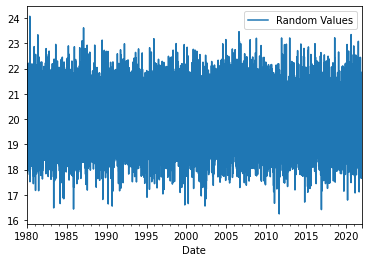

<IPython.core.display.Javascript object>

In [60]:
df_new.plot()  # Plotting the entire data series

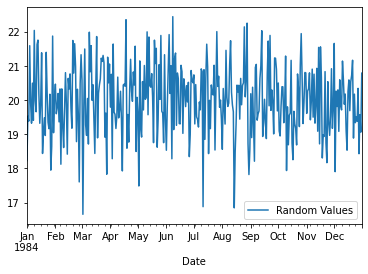

<IPython.core.display.Javascript object>

In [61]:
df_new["1984"].plot()  # Plotting a sliced year data

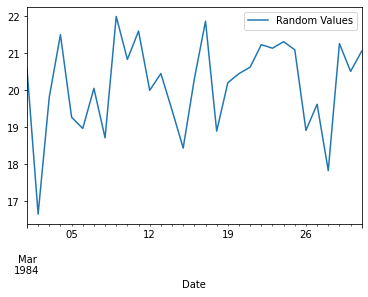

<IPython.core.display.Javascript object>

In [62]:
df_new["1984-03"].plot()  # Plotting a sliced month data

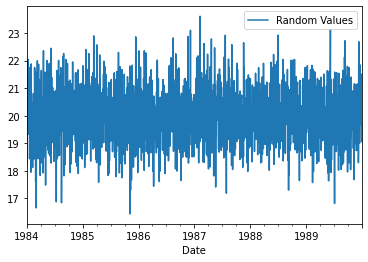

<IPython.core.display.Javascript object>

In [63]:
df_new["1984":"1989"].plot()  # Plotting a sliced multi-year data

In [ ]:
# to plot into specific axes the axes to use can be provided with the `ax` argument
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
df_new[:"1989"].plot(ax=axes[0])
df_new["1989":"1990"].plot(ax=axes[1])

# Exercises

1. Create a dataframe and populate with a multi-column data of temperature and pressure.

2. Build a lambda function or a regular python function that computes the Potential Temperature based on the equation $\theta = T(1000/p)^{0.286}$, where $T$ is temperature in Kelvin, $p$ is pressure in hPa and $\theta$ is the potential temperature to be computed.

3. Write the Potential temperature output as a new series within the created dataframe.

4. Print out the first 20 rows of the new dataframe.

In [ ]:
import pandas as pd
import numpy as np
import random

# Random temperature and pressure data
data = {
    "Temperature": np.random.rand(100) + 30,
    "Pressure": np.random.rand(100) * 800,
}

new_df = pd.DataFrame(data, columns=list(data))
new_df

In [ ]:
potential_temp = lambda t, p: (t + 273.15) * (1000 / p) ** 0.286
potential_temp(t=30.0, p=1000.0)

In [ ]:
new_df["Potential Temperature"] = potential_temp(
    new_df["Temperature"], new_df["Pressure"]
)
new_df

In [ ]:
new_df.head(20)

Part 2 will focus on working with a spreadsheet (Excel Document). Let's keep fingers crossed :)